                                                                            Workshop #4

                                            Working with DataFrame. Data preprocessing. Fill in the missing values.

The purpose of the work: gaining skills in working with DataFrame. Learning methods of data pre-processing and fill in missing values.

Progress: For preparation we use files 5. Visualization.pptx, 6. Visualization.ipynb, 7. Preprocessing.pptx, 8. Preprocessing.ipynb from Lecture folder.

    1. Download the Dataset_all.xlsx file to DataFrame.

In [6]:
dataset_path = "Dataset_all.xlsx"
#path to dataset file

    2. Estimate the number of missing values in each feature

In [7]:
#import libraries
import numpy as np
import pandas as pd
import xlwings as xw
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [8]:
dataset = pd.read_excel(dataset_path, header= 1)
dataset

,№иб,Діагноз,пол,возраст,одышка,одышка при физнагрузке,невозможность вдохнуть полной грудью,скованность в гр клетке,нехватка воздуха,нарушение ночного сна,...,отклонение ЭОС,нарушение АВ-проводимости,реполяриз изменения,правые камеры,ритм,нарушение внутрижелуд пров,блокада пучка Гиса,ГМЛЖ,рестриктивный тип,обструктивный тип
0,1440.0,ХОЗЛ,0.0,79.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
1,1484.0,ХОЗЛ,0.0,76.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,3.0
2,1497.0,ХОЗЛ,1.0,72.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1530.0,ХОЗЛ,1.0,54.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
4,1583.0,ХОЗЛ,0.0,81.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,4868.0,Пневмонія,1.0,84.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
128,5033.0,Пневмонія,0.0,67.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0
129,5079.0,Пневмонія,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
130,5050.0,Пневмонія,0.0,82.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [9]:
false_lst = [] # A letter that will collect the number of errors from each column
for i in range(len(dataset.index)) : 
    print(" Total NaN in row", i + 1, ":", dataset.iloc[i].isnull().sum())
    false_lst.append(dataset.iloc[i].isnull().sum())
print("number of missing values: ", sum(false_lst))

 Total NaN in row 1 : 1
 Total NaN in row 2 : 0
 Total NaN in row 3 : 2
 Total NaN in row 4 : 2
 Total NaN in row 5 : 2
 Total NaN in row 6 : 2
 Total NaN in row 7 : 2
 Total NaN in row 8 : 7
 Total NaN in row 9 : 2
 Total NaN in row 10 : 3
 Total NaN in row 11 : 3
 Total NaN in row 12 : 7
 Total NaN in row 13 : 3
 Total NaN in row 14 : 7
 Total NaN in row 15 : 3
 Total NaN in row 16 : 7
 Total NaN in row 17 : 3
 Total NaN in row 18 : 4
 Total NaN in row 19 : 2
 Total NaN in row 20 : 4
 Total NaN in row 21 : 4
 Total NaN in row 22 : 4
 Total NaN in row 23 : 2
 Total NaN in row 24 : 6
 Total NaN in row 25 : 8
 Total NaN in row 26 : 1
 Total NaN in row 27 : 3
 Total NaN in row 28 : 3
 Total NaN in row 29 : 3
 Total NaN in row 30 : 3
 Total NaN in row 31 : 7
 Total NaN in row 32 : 1
 Total NaN in row 33 : 8
 Total NaN in row 34 : 7
 Total NaN in row 35 : 0
 Total NaN in row 36 : 8
 Total NaN in row 37 : 7
 Total NaN in row 38 : 1
 Total NaN in row 39 : 9
 Total NaN in row 40 : 8
 Total Na

    3. Delete those columns whose values contain more than 20% of gaps using the df.dropna() method and parameter thresh:

In [12]:
print("Task3")
colum = len(dataset.columns)
print("colums on dataset: ",colum)
# 20% = 1/5 MaxColum
false_colums = []
for i in range(len(dataset.index)) : 
    if dataset.iloc[i].isnull().sum() >= colum/5:
        i1 = i + 1 #index false colum
        false_colums.append(i1)


Task3
colums on dataset:  106


In [13]:
# delete rows by index
for i in false_colums:
    dataset.drop(labels = [i],axis = 0)

    4. Fill in the gaps by the method (df.fillna ()) with parameter
    df.mean()
    and save the results to DataFrame df_filled_mean.

In [14]:
print("Task4")
dataset.fillna(method='ffill')
#in new versions of the module metod df.mean() replaced by the method'ffill'

Task4


,№иб,Діагноз,пол,возраст,одышка,одышка при физнагрузке,невозможность вдохнуть полной грудью,скованность в гр клетке,нехватка воздуха,нарушение ночного сна,...,отклонение ЭОС,нарушение АВ-проводимости,реполяриз изменения,правые камеры,ритм,нарушение внутрижелуд пров,блокада пучка Гиса,ГМЛЖ,рестриктивный тип,обструктивный тип
0,1440.0,ХОЗЛ,0.0,79.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
1,1484.0,ХОЗЛ,0.0,76.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,3.0
2,1497.0,ХОЗЛ,1.0,72.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1530.0,ХОЗЛ,1.0,54.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
4,1583.0,ХОЗЛ,0.0,81.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,4868.0,Пневмонія,1.0,84.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
128,5033.0,Пневмонія,0.0,67.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0
129,5079.0,Пневмонія,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
130,5050.0,Пневмонія,0.0,82.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


    5.	Create your own method for fill in gaps in data.

In [15]:
df_filled = dataset.set_index("№иб")
missed_rows = dataset[dataset.isnull().any(1)]
without_missed_rows = dataset.dropna()
missed_cols= dataset.loc[:, dataset.isnull().any()]
missed_cols_dropna = missed_cols.dropna()

not_missed =  without_missed_rows.drop(list(missed_cols.columns), 1)
not_missed.iloc[:, 2:].apply(pd.to_numeric)

missed_data = missed_rows.drop(list(missed_cols.columns), 1)
missed_data.iloc[:, 2:].apply(pd.to_numeric)

C:\Users\olyad\AppData\Local\Temp/ipykernel_4848/269918329.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  not_missed =  without_missed_rows.drop(list(missed_cols.columns), 1)
C:\Users\olyad\AppData\Local\Temp/ipykernel_4848/269918329.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  missed_data = missed_rows.drop(list(missed_cols.columns), 1)


,пол,возраст,одышка,одышка при физнагрузке,невозможность вдохнуть полной грудью,скованность в гр клетке,нехватка воздуха,нарушение ночного сна,удушье,заложенность носа,...,отклонение ЭОС,нарушение АВ-проводимости,реполяриз изменения,правые камеры,ритм,нарушение внутрижелуд пров,блокада пучка Гиса,ГМЛЖ,рестриктивный тип,обструктивный тип
0,0.0,79.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
2,1.0,72.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,54.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
4,0.0,81.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0
5,0.0,55.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1.0,84.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
128,0.0,67.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0
129,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
130,0.0,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


- calculate the distance between the patient with a gap and other patients by the features that do not contain gaps.

In [16]:
dict_lenght, dict_sum_reverse, membership_lev = dict(), dict(), dict()
missed_patients = list(missed_data["№иб"])

for ind in range(len(missed_data)):
    pd_1 = abs(not_missed.iloc[:, 2:] - missed_data.iloc[ind, 2:])
    list_lenght, list_reverse = list(), list()
    for i in range(len(pd_1)):
        val=sum(list(pd_1.iloc[i]))/len(list(missed_cols.columns))
        list_lenght.append(val)
        list_reverse.append(1/val)
    dict_lenght[missed_patients[ind]] = list_lenght
    dict_sum_reverse[missed_patients[ind]] = sum(list_reverse)

- determine the membership degree of the patient with a gap to other patients as a function of the inverse distance. This function is normalized, it varies from 0 to 1 (0 – not similar, 1 – very similar)

In [17]:
for ind in dict_sum_reverse.keys():
    membership_lev[ind] = [(1/dict_lenght[ind][i])/dict_sum_reverse[ind] for i in range(len(dict_lenght[ind]))]

- fill in the gap in the data

In [18]:
for ind, name in enumerate(list(missed_cols)):
    dict_val = {}
    for i, val in membership_lev.items():
        l=[val[k]*float(list(missed_data.iloc[ind, 2:])[k]) for k in range(len(val))]
        dict_val[i] = sum(l)
    df_filled[name] = df_filled[name].fillna(dict_val)
df_filled

,Діагноз,пол,возраст,одышка,одышка при физнагрузке,невозможность вдохнуть полной грудью,скованность в гр клетке,нехватка воздуха,нарушение ночного сна,удушье,...,отклонение ЭОС,нарушение АВ-проводимости,реполяриз изменения,правые камеры,ритм,нарушение внутрижелуд пров,блокада пучка Гиса,ГМЛЖ,рестриктивный тип,обструктивный тип
№иб,,,,,,,,,,,,,,,,,,,,,
1440.0,ХОЗЛ,0.0,79.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
1484.0,ХОЗЛ,0.0,76.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,3.0
1497.0,ХОЗЛ,1.0,72.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1530.0,ХОЗЛ,1.0,54.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
1583.0,ХОЗЛ,0.0,81.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868.0,Пневмонія,1.0,84.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
5033.0,Пневмонія,0.0,67.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0
5079.0,Пневмонія,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


    6.	Visualize the data using PCA method (do all steps from Workshop#3 for data visualization). Use StandardScaler() or MinMaxScaler() method before visualization.

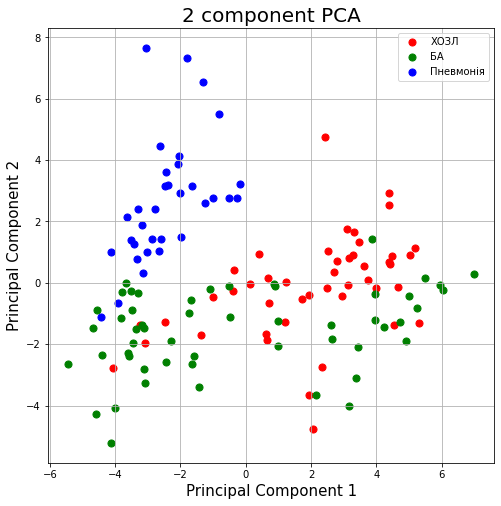

In [19]:
#MinMaxScaler()
df_normalized =df_filled
groups = df_normalized.groupby("Діагноз")
for col in df_normalized.columns[1:]:
    df_normalized[col] = (df_normalized[col] - df_normalized[col].min())/ (df_normalized[col].max() - df_normalized[col].min())

x = df_normalized.iloc[:, 1:].values
y = df_normalized.iloc[:, 0]
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_normalized[['Діагноз']].reset_index().iloc[:, 1]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Діагноз'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()